In [55]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
total_data = pd.merge(ride_df,city_df, on="city")

# Display the data table for preview
total_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

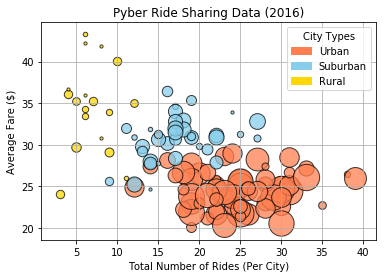

In [185]:
# Obtain the x and y coordinates for each of the three city types

#loop through dataframe and append to dictionaries
city_dict = {}
detail_dict = {}

for i in range(0,len(total_data['city'])):
    current_row = total_data.iloc[i]
    my_type = current_row['type']
    if current_row['city'] in city_dict:
        city_dict[current_row['city']].append(current_row['fare'])
    else:
        city_dict[current_row['city']] = [current_row['fare']]
        detail_dict[current_row['city']] = (current_row['driver_count'], current_row['type'])
#loop through dictionary and plot point
fig,ax = plt.subplots()
for city in city_dict:
    x = len(city_dict[city])
    y = np.array(city_dict[city]).mean()
    if (detail_dict[city])[1] == 'Urban':
        c = 'coral'
        label = 'Urban'
    if (detail_dict[city])[1] == 'Suburban':
        c = 'skyblue'
        label = 'Suburban'
    if (detail_dict[city])[1] == 'Rural':
        c = 'gold'
        label = 'Rural'
    s = detail_dict[city][0]
    ax.scatter(x, y, label = label, s = 10*s, c = c, edgecolors = 'black', alpha=0.75 )

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)");
plt.xlabel("Total Number of Rides (Per City)");
plt.ylabel("Average Fare ($)");
# Create a legend
#plt.legend(('Rural', 'Suburban', 'Urban'), ('gold','skyblue' ,'coral'));
from matplotlib.patches import Patch
legend_elements=[Patch(label='Urban',color='coral'),Patch(label='Suburban',color='skyblue'),Patch(label='Rural',color='gold')];
ax.legend(handles=legend_elements, loc='upper right', title = 'City Types');

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("Pyber_RideSharing_Data.png")

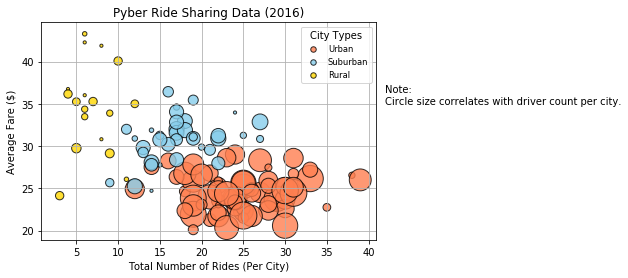

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

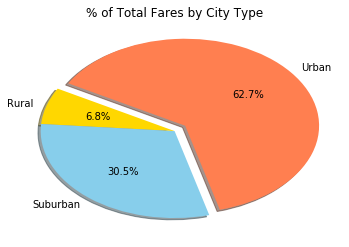

In [184]:
# Calculate Type Percents
total_fare = 0
for city in city_dict:
    for value in city_dict[city]:
        total_fare += value
total_fare = round(total_fare)


urban_fare = 0
rural_fare = 0
suburban_fare = 0

for city in city_dict:
    if (detail_dict[city])[1] == 'Urban':
        for value in city_dict[city]:
            urban_fare += value
    if (detail_dict[city])[1] == 'Rural':
        for value in city_dict[city]:
            rural_fare += value
    if (detail_dict[city])[1] == 'Suburban':
        for value in city_dict[city]:
            suburban_fare += value

percent_urban_fare = (urban_fare / total_fare)*100
percent_rural_fare = (rural_fare / total_fare)*100
percent_suburban_fare = (suburban_fare / total_fare)*100


# Build Pie Chart
city_types = ['Urban','Rural','Suburban']
explode = [0.1,0,0]
percent_fare = [percent_urban_fare, percent_rural_fare, percent_suburban_fare]
colors = ['coral','gold','skyblue']

fig,ax = plt.subplots();
plt.pie(percent_fare, explode=explode, labels=city_types, colors=colors,
        autopct="%0.1f%%", shadow=True, startangle=285);
plt.axis("off");
plt.title("% of Total Fares by City Type");
ax.set_aspect(aspect = 'auto');

# Save Figure
plt.savefig("TotalFares_CityType.png")
plt.show()

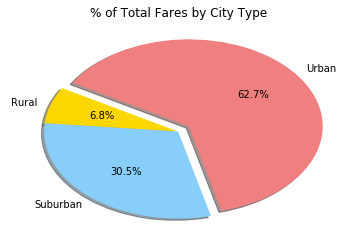

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

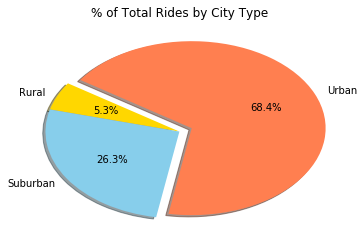

In [190]:
# Calculate Ride Percents

total_rides = 0
for city in city_dict:
    total_rides += len(city_dict[city])
total_rides

urban_rides = 0
rural_rides = 0
suburban_rides = 0

for city in city_dict:
    if (detail_dict[city])[1] == 'Urban':
        urban_rides += len(city_dict[city])
    if (detail_dict[city])[1] == 'Rural':
        rural_rides += len(city_dict[city])
    if (detail_dict[city])[1] == 'Suburban':
        suburban_rides += len(city_dict[city])
        
percent_urban_rides = (urban_rides / total_rides)*100
percent_rural_rides = (rural_rides / total_rides)*100
percent_suburban_rides = (suburban_rides / total_rides)*100

# Build Pie Chart

city_types = ['Urban','Rural','Suburban']
explode = [0.1,0,0]
percent_fare = [percent_urban_rides, percent_rural_rides, percent_suburban_rides]
colors = ['coral','gold','skyblue']

fig,ax = plt.subplots();
plt.pie(percent_fare, explode=explode, labels=city_types, colors=colors,
        autopct="%0.1f%%", shadow=True, startangle=260);
ax.set_aspect(aspect = 'auto');
plt.title("% of Total Rides by City Type");
# Save Figure
plt.savefig("TotalRides_CityType.png")
plt.show()

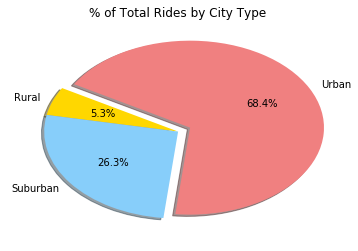

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

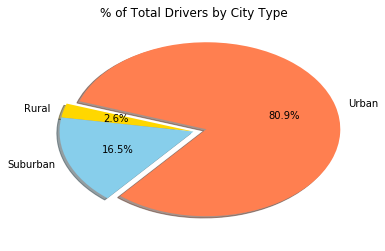

In [182]:
# Calculate Driver Percents

total_drivers = 0
for city in detail_dict:
    total_drivers += detail_dict[city][0]
total_drivers

urban_drivers = 0
rural_drivers = 0
suburban_drivers = 0

for city in city_dict:
    if (detail_dict[city])[1] == 'Urban':
        urban_drivers += details_dict[city][0]
    if (detail_dict[city])[1] == 'Rural':
        rural_drivers += details_dict[city][0]
    if (detail_dict[city])[1] == 'Suburban':
        suburban_drivers += details_dict[city][0]

percent_urban_drivers = (urban_drivers / total_drivers)*100
percent_rural_drivers = (rural_drivers / total_drivers)*100
percent_suburban_drivers = (suburban_drivers / total_drivers)*100

# Build Pie Charts
city_types = ['Urban','Rural','Suburban']
explode = [0.1,0,0]
percent_fare = [percent_urban_drivers, percent_rural_drivers, percent_suburban_drivers]
colors = ['coral','gold','skyblue']

fig,ax = plt.subplots();
plt.pie(percent_fare, explode=explode, labels=city_types, colors=colors,autopct="%0.1f%%", shadow=True, startangle=230);

ax.set_aspect(aspect = 'auto');
plt.title("% of Total Drivers by City Type");

# Save Figure
plt.savefig("TotalDrivers_CityType.png")
plt.show()


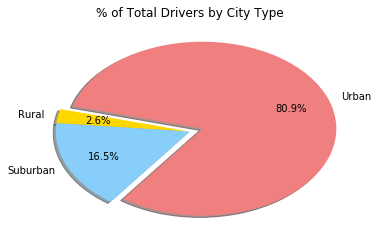

In [6]:
# Show Figure
plt.show()